In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Conectar a la base de datos

In [2]:
import psycopg2
import os
from dotenv import load_dotenv

load_dotenv(dotenv_path="../credenciales.env")
# Configura los parámetros de la conexión

db_host = os.getenv("DB_HOST_AWS")
db_username = os.getenv("DB_USER_AWS")
db_password = os.getenv("DB_PASSWORD_AWS")
db_database = os.getenv("DB_DATABASE_AWS")
db_port = int(os.getenv("DB_PORT_AWS", 5432))


# Establecer la conexión
try:
    connection = psycopg2.connect(host=db_host,
                                  database=db_database,
                                  user=db_username,
                                  password=db_password,
                                  port=db_port,
                                  sslmode="require")
    

    print("Conexión exitosa a la base de datos PostgreSQL con SSL")

except psycopg2.OperationalError as e:
    print("Error de conexión:", e)
except Exception as error:
    print("Error desconocido:", error)

Conexión exitosa a la base de datos PostgreSQL con SSL


In [3]:
# Escribe la consulta SQL
query = "SELECT * FROM sociosanitarios_formulario"
# Usa pandas para ejecutar la consulta y convertirla en un DataFrame
df_4 = pd.read_sql_query(query, connection, index_col = "sociosanitario_id")

C:\Users\Jjaavviieerroperro\AppData\Local\Temp\ipykernel_141652\3116226698.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4 = pd.read_sql_query(query, connection, index_col = "sociosanitario_id")


In [4]:
df_4

,provincia,ambito_laboral
sociosanitario_id,,
1,Álava,Centro de Salud
2,Álava,Centro de Salud
3,Segovia,Hospital
4,Almería,Asociación
5,Salamanca,Otro
...,...,...
99,Toledo,Centro comunitario
100,Melilla,Centro comunitario
101,Palencia,Centro de Salud


In [5]:
df_4["especialidad"].value_counts()

especialidad
Trabajador social      30
Psicólogo              27
Especialista en ETS    26
Voluntario             24
Name: count, dtype: int64

In [6]:
df_4["ambito_laboral"].value_counts()

ambito_laboral
Asociación            27
Centro de salud       27
Centro comunitario    27
Hospitalario          26
Name: count, dtype: int64

In [7]:
df_4["ciudad"].value_counts()

ciudad
Valencia     19
Salamanca    14
Barcelona    14
Madrid       14
Sevilla      11
Toledo       10
A Coruña      9
Cádiz         9
Zaragoza      7
Name: count, dtype: int64

In [23]:
# Escribe la consulta SQL
query = "SELECT * FROM preguntas"
# Usa pandas para ejecutar la consulta y convertirla en un DataFrame
df_1 = pd.read_sql_query(query, connection)


C:\Users\Jjaavviieerroperro\AppData\Local\Temp\ipykernel_104532\4261430220.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_1 = pd.read_sql_query(query, connection)


In [9]:
df_1

,pregunta_id,texto


In [10]:
# Escribe la consulta SQL
query = "SELECT * FROM admin_data"

# Usa pandas para ejecutar la consulta y convertirla en un DataFrame
df_2 = pd.read_sql_query(query, connection)

C:\Users\Jjaavviieerroperro\AppData\Local\Temp\ipykernel_104532\3716890679.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_2 = pd.read_sql_query(query, connection)


In [11]:
df_2

,admin_id,user_name,password
0,1,felgtbiqplus@gmail.com,123456abcdEF


In [12]:
# Escribe la consulta SQL
query = "SELECT * FROM no_sociosanit_formulario"

# Usa pandas para ejecutar la consulta y convertirla en un DataFrame
df_3 = pd.read_sql_query(query, connection, index_col="no_sociosanit_id")

C:\Users\Jjaavviieerroperro\AppData\Local\Temp\ipykernel_128432\1228490559.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3 = pd.read_sql_query(query, connection, index_col="no_sociosanit_id")


In [13]:
df_3.columns

Index(['edad', 'pronombre_el', 'pronombre_ella', 'pronombre_elle',
       'identidad_genero', 'orientacion_sexual', 'vives_en_espana', 'pais',
       'permiso_residencia', 'persona_racializada', 'persona_discapacitada',
       'persona_sin_hogar', 'persona_migrante', 'persona_intersexual',
       'nivel_estudios', 'situacion_afectiva', 'provincia'],
      dtype='object')

In [7]:
df_3.head()

,edad,pronombre_el,pronombre_ella,pronombre_elle,identidad_genero,orientacion_sexual,vives_en_espana,pais,permiso_residencia,persona_racializada,persona_discapacitada,persona_sin_hogar,persona_migrante,persona_intersexual,nivel_estudios,situacion_afectiva
no_sociosanit_id,,,,,,,,,,,,,,,,
1,0,True,True,True,Hombre Cis,Gay,True,string,True,True,True,True,True,True,Primarios,Soltero
2,0,True,True,True,Hombre Cis,Gay,True,string,True,True,True,True,True,True,Primarios,Soltero


In [14]:
print(list(df_3.columns))

['edad', 'pronombre_el', 'pronombre_ella', 'pronombre_elle', 'identidad_genero', 'orientacion_sexual', 'vives_en_espana', 'pais', 'permiso_residencia', 'persona_racializada', 'persona_discapacitada', 'persona_sin_hogar', 'persona_migrante', 'persona_intersexual', 'nivel_estudios', 'situacion_afectiva', 'provincia']


In [298]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107 entries, 1 to 107
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   edad                 107 non-null    int64 
 1   pronombres           107 non-null    object
 2   genero               107 non-null    object
 3   orientacion          107 non-null    object
 4   vives_espana         107 non-null    bool  
 5   pais                 107 non-null    object
 6   permiso_residencia   107 non-null    object
 7   persona_racializada  107 non-null    bool  
 8   discapacitade        107 non-null    bool  
 9   sin_hogar            107 non-null    bool  
 10  migrante             107 non-null    bool  
 11  intersexual          107 non-null    bool  
dtypes: bool(6), int64(1), object(5)
memory usage: 6.5+ KB


# Crear Grafico

C:\Users\Jjaavviieerroperro\AppData\Local\Temp\ipykernel_33140\1595709225.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Jjaavviieerroperro\AppData\Local\Temp\ipykernel_33140\1595709225.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




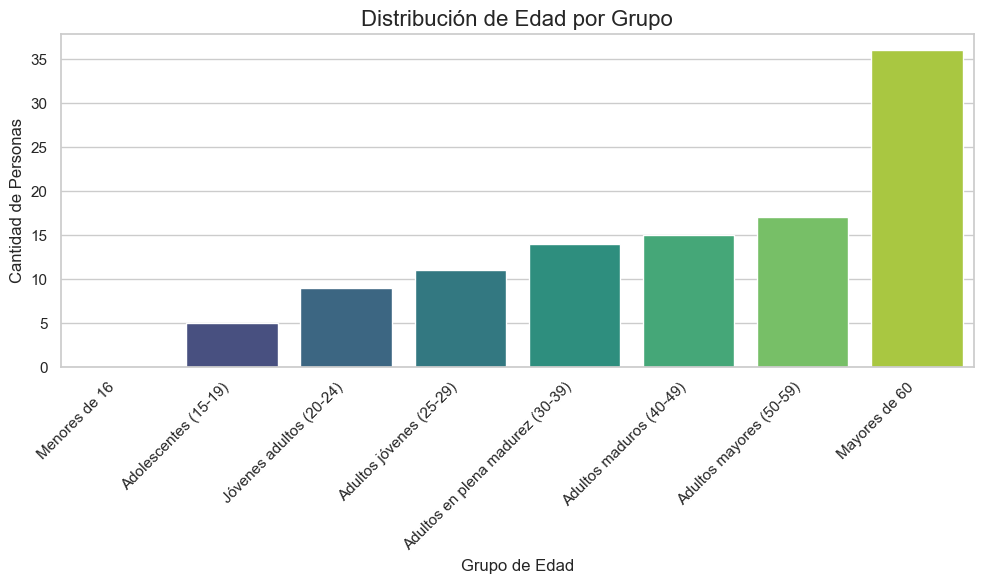

In [299]:
bins = [0, 15, 19, 24, 29, 39, 49, 59, 100]
labels = ['Menores de 16', 'Adolescentes (15-19)', 'Jóvenes adultos (20-24)', 
          'Adultos jóvenes (25-29)', 'Adultos en plena madurez (30-39)', 
          'Adultos maduros (40-49)', 'Adultos mayores (50-59)', 'Mayores de 60']

# Crear una nueva columna 'grupo_edad' con las categorías
df_3['grupo_edad'] = pd.cut(df_3['edad'], bins=bins, labels=labels, right=False)

# Contar la cantidad de personas en cada grupo de edad
edad_grupo = df_3.groupby('grupo_edad').size().reset_index(name='cantidad')

# Configuración de visualización
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='grupo_edad', y='cantidad', data=edad_grupo, palette="viridis")

# Personalización del gráfico
plt.title('Distribución de Edad por Grupo', fontsize=16)
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('Cantidad de Personas', fontsize=12)
plt.xticks(rotation=45, ha='right') 

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [300]:
df_3.head()

,edad,pronombres,genero,orientacion,vives_espana,pais,permiso_residencia,persona_racializada,discapacitade,sin_hogar,migrante,intersexual,grupo_edad
user_id,,,,,,,,,,,,,
1,20,el,hombre_cis,gay,True,espana,Con permiso de residencia,True,False,True,True,True,Jóvenes adultos (20-24)
2,35,elle,otro,bisexual,False,espana,Con permiso de residencia,False,True,True,False,False,Adultos en plena madurez (30-39)
3,42,ella,mujer_cis,lesbiana,True,colombia,Con permiso de residencia,True,True,True,True,True,Adultos maduros (40-49)
4,61,elle,no_binarie,pansexual,False,ecuador,Permiso de residencia en trámite,False,False,False,False,False,Mayores de 60
5,55,el,hombre_cis,asexual,True,venezuela,Otros,True,False,True,False,True,Adultos mayores (50-59)


In [301]:
df_3["genero"].value_counts()

genero
mujer_cis       24
hombre_cis      22
otro            21
hombre_trans    15
no_binarie      13
mujer_trans     12
Name: count, dtype: int64

# Grafico 1: 
## Representación de Orientación por nacionalidad

In [302]:
import plotly.express as px

In [303]:
def crear_grafico_pie(dataframe, viven_espana=True):

    #Filtro para el DataFrame
    filtro = dataframe['vives_espana'] == viven_espana
    df_filtrado = dataframe[filtro]
    
    #Conteo de orientaciones
    colectivos_count = df_filtrado['orientacion'].value_counts().reset_index()
    colectivos_count.columns = ['Orientacion', 'Cantidad']
    
    #Tener en cuenta ambas posibilidades
    titulo = "Distribución de Orientación Sexual"
    if viven_espana:
        titulo += " (Personas que Viven en España)"
    else:
        titulo += " (Personas que No Viven en España)"
    
    fig = px.pie(colectivos_count, 
                 values='Cantidad', 
                 names='Orientacion', 
                 title=titulo,
                 color_discrete_sequence=px.colors.qualitative.Pastel)
    
    return fig


fig = crear_grafico_pie(df_3, viven_espana=True)
fig.show()

In [304]:
fig = crear_grafico_pie(df_3, viven_espana=False)
fig.show()


# Grafico 2:
## Orientacio y genero

In [305]:
def barras_apiladas_genero_orientacion(dataframe):

    # Agrupar y contar las combinaciones de género y orientación
    datos_agrupados = dataframe.groupby(['genero', 'orientacion']).size().reset_index(name='Cantidad')
    
    #Comfigurar el Gráfico
    fig = px.bar(datos_agrupados,
                 x='genero',
                 y='Cantidad',
                 color='orientacion',
                 title='Distribución de Género y Orientación Sexual',
                 labels={'genero': 'Género', 'orientacion': 'Orientación Sexual'},
                 barmode='stack',  
                 color_discrete_sequence=px.colors.qualitative.Pastel)
    
    return fig


In [306]:
fig = barras_apiladas_genero_orientacion(df_3)
fig.show()

In [307]:
import plotly.express as px

def graficar_combinaciones(df_3):
    
    #Agrupación y conteo:
    combinaciones = df_3.groupby(['persona_racializada', 'discapacitade', 'sin_hogar', 'migrante']).size().reset_index(name='Cantidad')
    
    #Agrupar por columnas:
    combinaciones['Combinación'] = combinaciones.apply(
        lambda row: f"Racializada: {row['persona_racializada']}, Discapacidad: {row['discapacitade']}, "
                    f"Hogar: {row['sin_hogar']}, Migrante: {row['migrante']}", axis=1)
    
    #Configuración gráfico de barras:
    fig = px.bar(combinaciones, 
                 x='Combinación', 
                 y='Cantidad', 
                 title='Frecuencia de Combinaciones de Condiciones',
                 labels={'Combinación': 'Combinación de Condiciones', 'Cantidad': 'Número de Personas'},
                 color='Cantidad',
                 color_continuous_scale='Viridis')

    #Etiquetas
    fig.update_layout(xaxis_tickangle=45)
    fig.show()





In [308]:
graficar_combinaciones(df_3)

# Permisos de residencia
## Conteo de Valores

In [309]:
import plotly.express as px

def graficar_permiso_residencia(df_3):
    # Contar las frecuencias de los valores en la columna 'permiso_residencia'
    permiso_count = df_3['permiso_residencia'].value_counts().reset_index()
    permiso_count.columns = ['Permiso de Residencia', 'Cantidad']
    
    #Calcular los porcentajes
    total = permiso_count['Cantidad'].sum()
    permiso_count['Porcentaje'] = (permiso_count['Cantidad'] / total) * 100
    
    #Calcular el índice de la sección con el valor más grande
    max_value_index = permiso_count['Cantidad'].idxmax()
    
    #Crear un vector donde la porción con el valor más grande será destacada
    pull_values = [0 if i != max_value_index else 0.1 for i in range(len(permiso_count))]
    
    # Crear gráfico de pastel (pie chart) con cantidades y porcentajes
    fig = px.pie(permiso_count, 
                 names='Permiso de Residencia', 
                 values='Cantidad', 
                 title='Distribución de Permisos de Residencia',
                 labels={'Permiso de Residencia': 'Tipo de Permiso'},
                 color='Permiso de Residencia',
                 color_discrete_sequence=px.colors.qualitative.Set1,
                 hole=0.3)  # Pie chart con un agujero en el centro (para hacerlo tipo donut)
    
    # Añadir texto de porcentajes y cantidades dentro del gráfico
    fig.update_traces(pull=pull_values)
    
    fig.show()


In [310]:
graficar_permiso_residencia(df_3)